# - 8px - Grayscale -

In [1]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

## Radial

In [2]:
driver = Img_Driver()

X = driver.pixels_rgb(8, rgb=False, divider=255)
Y = [1.0 if x >= (1520*2) else -1.0 for x in range(4560)]

X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
Y_test = [1.0 if x < 80 else -1.0 for x in range(240)]

# X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
# Y_test = [1.0 if x < 80 else 0.0 for x in range(240)]

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:1])
print()

X : 4560 64
[[0.6901960784313725, 0.6509803921568628, 0.611764705882353, 0.5764705882352941, 0.5450980392156862, 0.5058823529411764, 0.4588235294117647, 0.41568627450980394, 0.6862745098039216, 0.6549019607843137, 0.611764705882353, 0.5725490196078431, 0.5411764705882353, 0.4980392156862745, 0.4627450980392157, 0.4196078431372549, 0.6666666666666666, 0.6431372549019608, 0.6039215686274509, 0.5607843137254902, 0.5254901960784314, 0.49411764705882355, 0.4627450980392157, 0.42745098039215684, 0.6392156862745098, 0.6196078431372549, 0.5803921568627451, 0.5529411764705883, 0.48627450980392156, 0.4823529411764706, 0.47058823529411764, 0.4392156862745098, 0.6196078431372549, 0.6039215686274509, 0.5215686274509804, 0.5176470588235295, 0.4588235294117647, 0.4666666666666667, 0.4745098039215686, 0.4470588235294118, 0.596078431372549, 0.5882352941176471, 0.4627450980392157, 0.3843137254901961, 0.5333333333333333, 0.47058823529411764, 0.4549019607843137, 0.44313725490196076, 0.5843137254901961, 0.

Accuracy : 4560 / 4560
100.0%

Test accuracy : 134 / 240
55.8%



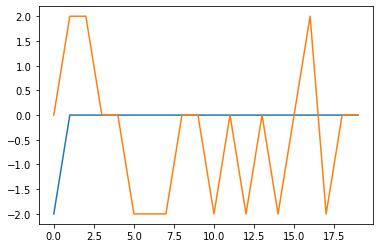

1050.35702586174


In [3]:
from ruster_rbf import Ruster_RBF
r = Ruster_RBF(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

gamma = 2.5
ndim = 64
model_size = len(X)
model = r.create_linear_model(model_size-1)

# model_np = r.npify(model, model_size)
# print(model_np)
# print()

XF = [item for sublist in X for item in sublist]
XF_test = [item for sublist in X_test for item in sublist]
YF = Y

losses = []
test_losses = []

for i in range(20):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_rbf_naive(model, XF, X[rand_idx], ndim, gamma, True)
    predict_test = r.predict_rbf_naive(model, XF_test, X_test[rand_idx_test], ndim, gamma, True)
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_rbf(model, XF, Y, ndim, 50, 0.001, gamma)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]}")
#     print()

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_rbf_naive(model, XF, X[i], ndim, gamma, True)
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_rbf_naive(model, XF_test, X_test[i], ndim, gamma, True)
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size, 3380101)

r.destroy(model, model_size)

Accuracy : 4560 / 4560
100.0%

Test accuracy : 137 / 240
57.1%



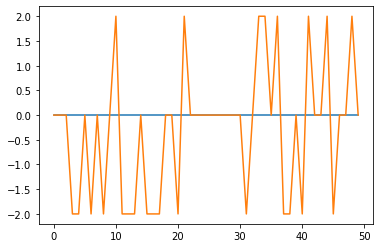

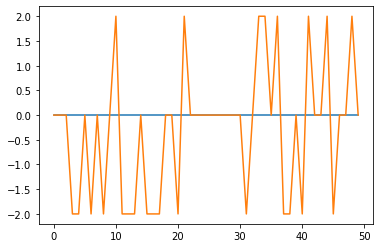

2375.720482826233


In [4]:
from ruster_rbf import Ruster_RBF
r = Ruster_RBF(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

gamma = 2.5
ndim = 64
model_size = len(X)
model = r.create_linear_model(model_size-1)

# model_np = r.npify(model, model_size)
# print(model_np)
# print()

XF = [item for sublist in X for item in sublist]
XF_test = [item for sublist in X_test for item in sublist]
YF = Y

losses = []
test_losses = []

for i in range(50):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_rbf_naive(model, XF, X[rand_idx], ndim, gamma, True)
    predict_test = r.predict_rbf_naive(model, XF_test, X_test[rand_idx_test], ndim, gamma, True)
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_rbf(model, XF, Y, ndim, 50, 0.001, gamma)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]}")
#     print()

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_rbf_naive(model, XF, X[i], ndim, gamma, True)
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_rbf_naive(model, XF_test, X_test[i], ndim, gamma, True)
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

plt.plot(losses)
plt.plot(test_losses)
plt.show()

plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size, 3380201)

r.destroy(model, model_size)